# 2110443 - Computer Vision (2020/2)
## Lab 2 - Basic Image Processing
In this lab, we will play with basic image pixel manipulation in grayscale images. This notebook includes both coding and written questions. Please hand in this notebook file with all outputs and your answer

Import OpenCV, Numpy and Matplotlib as always

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import urllib.request
import json
%matplotlib inline

Use <a href="https://docs.opencv.org/3.4.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56">imread</a>  function to read image from file in <b>grayscale</b> format and display its dimension

In [2]:
inputImage = cv2.imread("assets/lena_std.tif",cv2.IMREAD_GRAYSCALE)
print('inputImage variable data type =>', type(inputImage))
print('inputImage variable numpy data type =>', inputImage.dtype)
print('inputImage dimensions', inputImage.shape)
print(inputImage)

inputImage variable data type => <class 'numpy.ndarray'>
inputImage variable numpy data type => uint8
inputImage dimensions (512, 512)
[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


We need to specify matplotlib imshow <a href="https://matplotlib.org/tutorials/colors/colormaps.html">colormap</a> (cmap) as gray to display grayscale images.

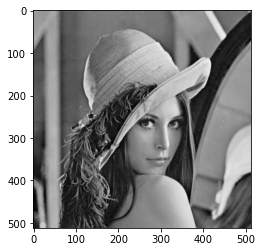

In [3]:
plt.imshow(inputImage, cmap='gray')
plt.show()

## Basic Numpy and Pixel Manipulation 
This section is mostly modifed from Standford CS131 Numpy Tutorial!

### Create Numpy Array
There are many ways to create a numpy array. For examples,
- Convert other Python data structures to np.array
- Use numpy functions to create new arrays (ex. np.ones, np.zeros, np.arange, np.randn, np.eye)
- Reading from file (in this class, images and videos!)

In [4]:
# From python list
a = np.array([[1,2,3,4,5],[6,7,8,9,10]])
print(a, a.shape)

print('===')
# From numpy function
b = np.eye(3)
print(b, b.shape)

# From numpy function
b = np.eye(3)
print(b, b.shape)

print('===')
# From file (image!)
c = cv2.imread('assets/lena_std.tif')
print(c.shape)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]] (2, 5)
===
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] (3, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] (3, 3)
===
(512, 512, 3)


### Numpy array attributes
Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Take a look at the attributes associated with a numpy array, and then we'll explore how numpy arrays determine their type.

In [5]:
print(c.shape) #tuple of dimensions
print(c.size) #total number of elements
print(c.dtype) #array data type

(512, 512, 3)
786432
uint8


In [6]:
a = np.array([1, 2])  # Let numpy choose the datatype
b = np.array([1.0, 2.0])  # Let numpy choose the datatype (default for floting point precision in numpy is 64-bit)
c = np.array([1, 2], dtype=np.int64)  # Specify data type

print(a.dtype, b.dtype, c.dtype)

int32 float64 int64


<b>You can discovery more about each data types range</b> <a href="https://numpy.org/doc/stable/user/basics.types.html">here</a>

### Accessing array elements
Numpy offers several ways to index into arrays. When arrays are one dimensional, indexing works just like lists. When arrays are 2 or more dimensional, you must an index for each dimension

In [7]:
# Create a 2-dimensional array (matrix)
# [[ 1  2  3]
#  [ 4  5  6]]

a = np.array([[1,2,3],[4,5,6]])   
print(a)

# Access the 3 with array indexing
a_3 = a[0,2]
print("expecting 3, got: ", a_3)

# Access the 4 with array indexing
a_4 = a[1,0]
print("expecting 4, got: ", a_4)

[[1 2 3]
 [4 5 6]]
expecting 3, got:  3
expecting 4, got:  4


In [8]:
a = np.arange(16)
print('np.arange', a)
a = a.reshape(4,4)
print('reshape', a.shape)
print(a)

# Access numpy slice
print('Row 0 ,Col 1-2')
print(a[0,1:3])

print('Row 0-1,Col 1-2')
print(a[0:2,1:3])

# Expected output for b
# [[1,2,3]
#  [5,6,7]
#  [9,10,11]
#  [13,14,15]]

print('==== b ====')
b = a[:, 1:]
print(b)


# Expected output for c
# [[8,9,10,11]
#  [12,13,14,15]]
print('==== c ====')
c = a[2:, :]
print(c)

np.arange [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
reshape (4, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
Row 0 ,Col 1-2
[1 2]
Row 0-1,Col 1-2
[[1 2]
 [5 6]]
==== b ====
[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]
 [13 14 15]]
==== c ====
[[ 8  9 10 11]
 [12 13 14 15]]


In [9]:
%%time
# Bad practice, you should not do this
inputImageTest = inputImage.copy()
for row in range(0,100):
    for col in range(0,inputImageTest.shape[1]):
        inputImageTest[row,col] = 255

Wall time: 12 ms


In [10]:
%%time
# Slice indexing version is a lot faster!
inputImageTest = inputImage.copy()
inputImageTest[0:100,:] = 255

Wall time: 1e+03 µs


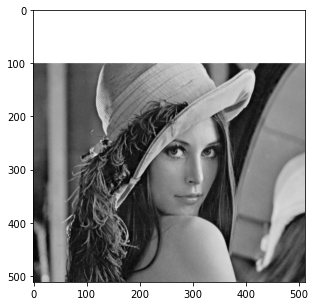

In [11]:
plt.figure(figsize=(5,5))
plt.imshow(inputImageTest, cmap='gray')
plt.show()

### Axis-based operations

Now that we've covered 2d indexing, there's some important numpy functions that operate on a particular axis, so let's get hands on with sum()! Many numpy operations including sum, max, argmax, mean, standard deviation operate over a chosen axis of your array.

In [12]:
a = np.arange(16)
print('np.arange', a)
a = a.reshape(4,4)
print('reshape', a.shape)
print(a)

np.arange [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
reshape (4, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [13]:
meanA = np.mean(a)
print('Array mean', meanA)

meanA_1 = np.mean(a, axis=0)
print('Array mean along first axis', meanA_1)

meanA_2 = np.mean(a, axis=1)
print('Array mean along second axis', meanA_2)

print('=====')

sumA = np.sum(a)
print('Array sum', sumA)

sumA_1 = np.sum(a,axis=0)
print('Array sum along first axis', sumA_1)

Array mean 7.5
Array mean along first axis [6. 7. 8. 9.]
Array mean along second axis [ 1.5  5.5  9.5 13.5]
=====
Array sum 120
Array sum along first axis [24 28 32 36]


In [14]:
%%time
# Bad practice, you should not do this
inputImageTest = inputImage.copy()
meanImageVal = 0
for row in range(0,inputImageTest.shape[0]):
    for col in range(0,inputImageTest.shape[1]):
        meanImageVal+=inputImageTest[row,col]
meanImageVal /= inputImageTest.size
print(meanImageVal)

124.04857635498047
Wall time: 133 ms


In [15]:
%%time
meanImageVal = np.mean(inputImage)
print(meanImageVal)

124.04857635498047
Wall time: 999 µs


In [16]:
# These function can also apply on indexing slice
sliceA = a[0:3, 1:]
print(sliceA, 'Sum',np.sum(sliceA), 'Mean',np.mean(sliceA), 'Std',np.std(sliceA))

[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]] Sum 54 Mean 6.0 Std 3.366501646120693


### Matrix Operation

In [19]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

print("x = \n", x)
print(x.dtype)
print("y = \n", y)
print(y.dtype)

x = 
 [[1. 2.]
 [3. 4.]]
float64
y = 
 [[5. 6.]
 [7. 8.]]
float64


In [20]:
# Matrix element-wise operation
z = x*2
print("z = \n",z)

z = x/2
print("z = \n",z)

z = x+10
print("z = \n",z)

z = 
 [[2. 4.]
 [6. 8.]]
z = 
 [[0.5 1. ]
 [1.5 2. ]]
z = 
 [[11. 12.]
 [13. 14.]]


In [21]:
# Element wise operation
z = x+y
print("z = \n",z)

z = x-y
print("z = \n", z)

z = x*y
print("z = \n", z)

z = np.matmul(x,y) #?
print("z = \n", z)

z = 
 [[ 6.  8.]
 [10. 12.]]
z = 
 [[-4. -4.]
 [-4. -4.]]
z = 
 [[ 5. 12.]
 [21. 32.]]
z = 
 [[19. 22.]
 [43. 50.]]


In [22]:
a = np.arange(16)
print('np.arange', a)
a = a.reshape(4,4)
print('reshape', a.shape)
print(a)

a[0:2, :] *=2
print(a)

np.arange [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
reshape (4, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 0  2  4  6]
 [ 8 10 12 14]
 [ 8  9 10 11]
 [12 13 14 15]]


In [23]:
a = np.array([255,255,255], dtype=np.uint8)
b = a + 1
print(b) # Overflow

[0 0 0]


## Assignment 1 - Pixel Manipulation
Use the provided mask to crop the famous "Lena Soderberg" face. 
Hint: - Only <b>Basic</b> numpy knowledge is required here! 

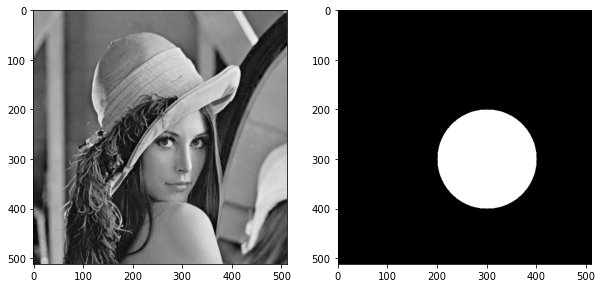

In [24]:
circleMask = np.zeros_like(inputImage) # Create numpy array of shape like inputImage with all zero values
cv2.circle(circleMask, (300,300), 100, (255), -1) # Draw white circle, origin at (300, 300) with radius of 100
                                                  # -1 in last argument is equivalent to cv2.FILLED
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(inputImage, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(circleMask, cmap='gray')
plt.show()

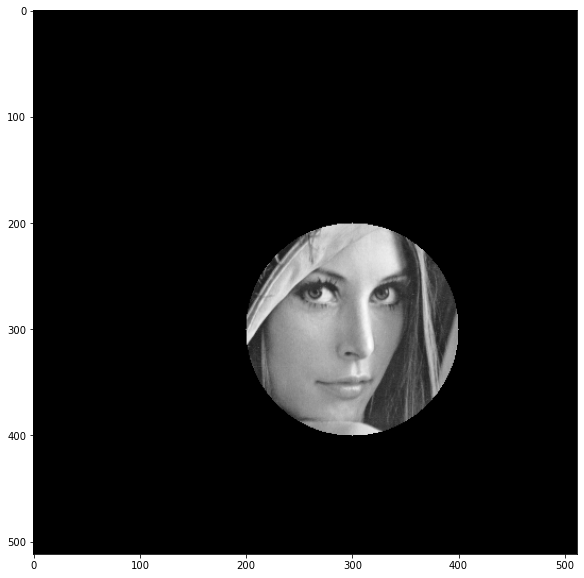

In [25]:
### FILL HERE ### (Very easy)
maskedImage = inputImage * (circleMask / 255).astype(np.uint8)
plt.figure(figsize=(10,10))
plt.imshow(maskedImage, cmap='gray')
#################

## Basic Image Filtering
OpenCV already provided us with a wide range of filtering operation. The most common one is image blurring which is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image.

### 1. Mean filter using <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37">cv2.blur</a> function
Simply takes the average of all the pixels in the kernel area

In [26]:
def cv2Blur(kernelSize):
    blurImage = cv2.blur(inputImage,(kernelSize,kernelSize))
    plt.figure(figsize=(5,5))
    plt.imshow(blurImage, cmap='gray')
    plt.show()
interact(cv2Blur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1));

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), Output()), _dom_cla…

### 2. Median Blur using <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9">cv2.medianBlur</a>
Read the document and try to "mimic" the above interactive visualization! <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9">cv2.medianBlur</a>

In [27]:
### FILL HERE ###
def cv2MedianBlur(kernelSize):
    blurImage = cv2.medianBlur(inputImage,kernelSize)
    plt.figure(figsize=(5,5))
    plt.imshow(blurImage, cmap='gray')
    plt.show()
interact(cv2MedianBlur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1));
#################

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), Output()), _dom_cla…

### 3. Gaussian Blur using <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1">cv2.GaussianBlur</a>
Gaussian blurring is highly effective in removing gaussian noise from the image. <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1">cv2.GaussianBlur</a>

In [28]:
def cv2GaussianBlur(kernelSize,sigmaX):
    gaussianBlurImage = cv2.GaussianBlur(inputImage,(kernelSize,kernelSize),sigmaX)
    print(cv2.getGaussianKernel(kernelSize,sigmaX))
    plt.figure(figsize=(5,5))
    plt.imshow(gaussianBlurImage, cmap='gray')
    plt.show()
interact(cv2GaussianBlur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1),sigmaX=widgets.IntSlider(min=1,max=35,step=2,value=1));

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), IntSlider(value=1, …

### 4. Bilateral Filter ==> <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed">cv2.bilateralFilter</a>
Bilateral filter can reduce unwanted noise very well while keeping edges fairly sharp. However, it is very slow compared to most filters.
Read the document and try to "mimic" the above interactive visualization! <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed">cv2.bilateralFilter</a>

In [29]:
### FILL HERE ###
def cv2BilateralFilter(d,sigmaColor,sigmaSpace):
    blurImage = cv2.bilateralFilter(inputImage,d,sigmaColor,sigmaSpace)
    plt.figure(figsize=(5,5))
    plt.imshow(blurImage, cmap='gray')
    plt.show()
interact(cv2BilateralFilter, 
         d = widgets.IntSlider(min=1,max=35,step=2,value=1), 
         sigmaColor = widgets.IntSlider(min=1,max=35,step=2,value=1), 
         sigmaSpace = widgets.IntSlider(min=1,max=35,step=2,value=1));
#################

interactive(children=(IntSlider(value=1, description='d', max=35, min=1, step=2), IntSlider(value=1, descripti…

### 5. Custom Kernel Filtering ==> <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04">cv2.filter2D</a>
<a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04">cv2.filter2D</a>

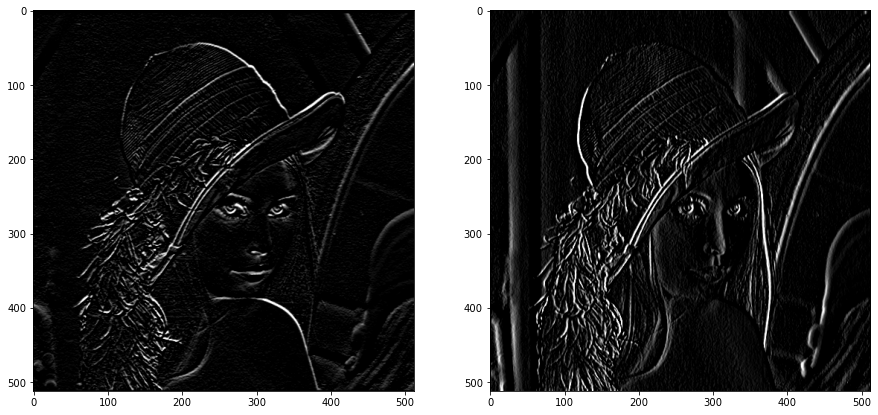

'\nWhat are these mysterious kernels do in your opinion?\nAns    It detects horizontal and vertical edges, respectively.\n'

In [30]:
xKernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) # Mysterious Kernel?
yKernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filter2DOutput1 = cv2.filter2D(inputImage,-1,xKernel)
filter2DOutput2 = cv2.filter2D(inputImage,-1,yKernel)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(filter2DOutput1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(filter2DOutput2, cmap='gray')
plt.show()

'''
What are these mysterious kernels do in your opinion?
Ans    It detects horizontal and vertical edges, respectively.
'''

### 6. Custom Kernel ==> Image Sharpening
More detail in next class :)

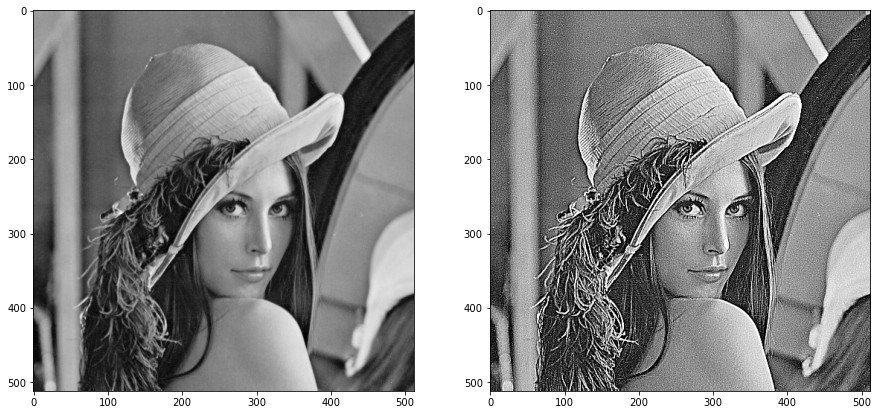

In [33]:
sharpenKernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpenOutput = cv2.filter2D(inputImage, -1, sharpenKernel)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(inputImage, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(sharpenOutput, cmap='gray')
plt.show()

## Assignment 2 - Which filter is the best?
The provided api are generated the random artificial noise into image. Your task is to implement the best way <b>(in your opinion)</b> to remove/eliminate those noise. Don't forget to state your reason in the following block. Answer can be in Thai or English.

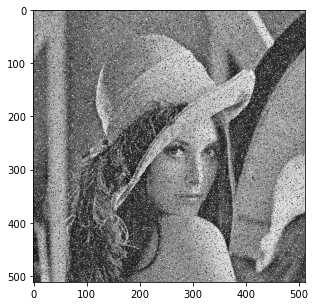

uint8


In [34]:
out1 = np.array(json.loads(urllib.request.urlopen('https://www.piclab.ai/classes/cv2020/lab2/noise1').read().decode('utf-8')),dtype=np.uint8)
plt.figure(figsize=(5,5))
plt.imshow(out1, cmap='gray')
plt.show()
print(out1.dtype)

In [491]:
def psnr(inputImage, reconImage):
    mse = np.mean(np.square(inputImage.astype(np.float32) - reconImage.astype(np.float32)))
    psnr = 10 * np.log10(255**2 / mse)
    return psnr

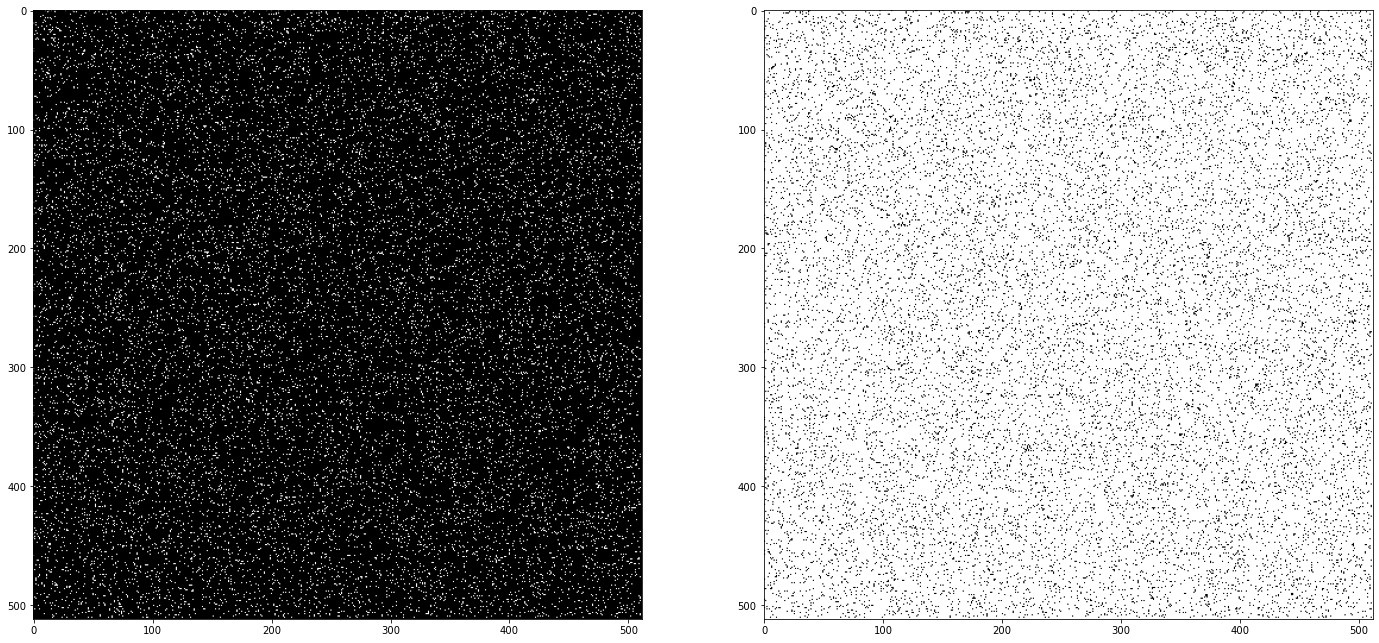

In [533]:
# Check for assumption: Are there outlier pixels in an image?
plt.figure(figsize=[24, 12])
plt.subplot(121)
white_spot = (out1 == 255) * 255
plt.imshow(white_spot, cmap='gray')
plt.subplot(122)
white_bg = np.ones_like(out1) * 255
black_spot = (out1 == 0)
plt.imshow(white_bg + black_spot, cmap='gray')

In [536]:
### FILL HERE ###
reconImage_1 = cv2.medianBlur(out1,3)
#################
'''
State your reason in this block!
As seen from above, there are many outlier pixels. So, median is a good representation of average.
kernelSize of 3 return acceptable reconstructed image but some white spots remains.
kernelSize of 5 return image that have no such spots but the image is too smooth.
'''

'\nState your reason in this block!\nAs seen from above, there are many outlier pixels. So, median is a good representation of average.\nkernelSize of 3 return acceptable reconstructed image but some white spots remains.\nkernelSize of 5 return image that have no such spots but the image is too smooth.\n'

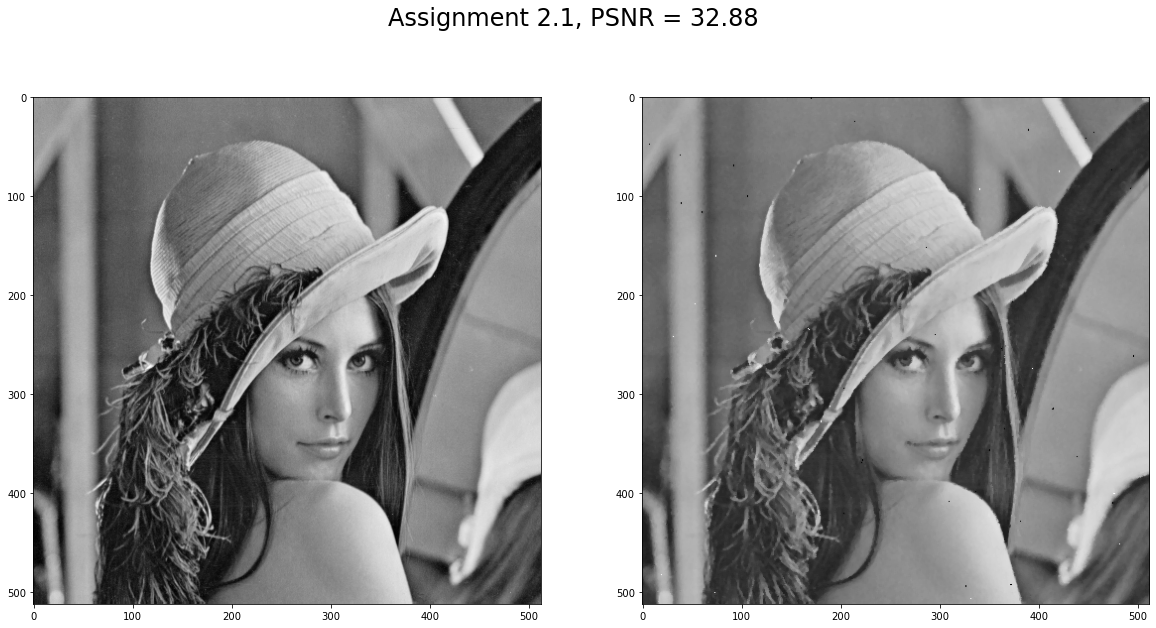

In [537]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(inputImage, cmap='gray')
plt.subplot(122)
plt.imshow(reconImage_1, cmap='gray')
plt.suptitle('Assignment 2.1, PSNR = %.2f' % psnr(inputImage, reconImage_1), size=24)
plt.show()

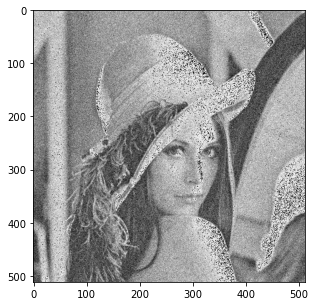

In [538]:
out2 = np.array(json.loads(urllib.request.urlopen('https://www.piclab.ai/classes/cv2020/lab2/noise2').read().decode('utf-8')),dtype=np.uint8)
plt.figure(figsize=(5,5))
plt.imshow(out2, cmap='gray')
plt.show()

In [545]:
### FILL HERE ###
reconImage_2 = out2.copy()
reconImage_2[reconImage_2 <= 30] = 255
reconImage_2 = cv2.medianBlur(reconImage_2, 5)
#################
'''
State your reason in this block!
From noisy image 'out2', it seems to have only pepper noise. So, I assign the value of 255 into pixels that have intensity below threshold (= 30).
After that, I applied medianBlur to the image.
'''

"\nState your reason in this block!\nFrom noisy image 'out2', it seems to have only pepper noise. So, I assign the value of 255 into pixels that have intensity below threshold (= 30).\nAfter that, I applied medianBlur to the image.\n"

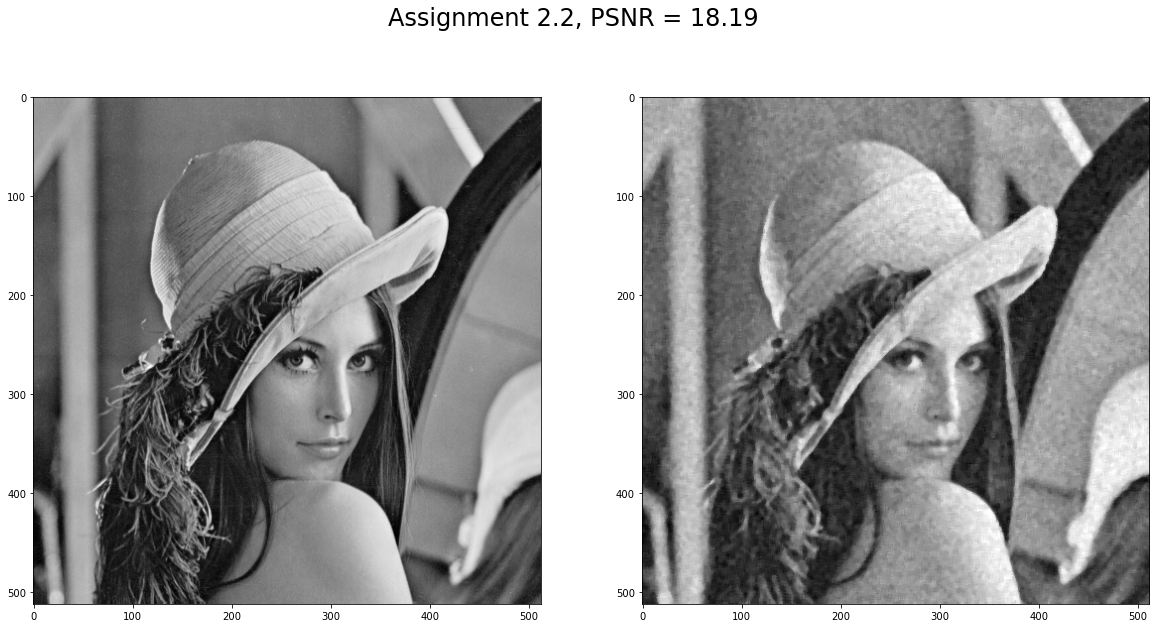

In [546]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(inputImage, cmap='gray')
plt.subplot(122)
plt.imshow(reconImage_2, cmap='gray')
plt.suptitle('Assignment 2.2, PSNR = %.2f' % psnr(inputImage, reconImage_2), size=24)
plt.show()

## Assignment 3 - Implementing your own filter2D function
![title](assets/Lab2-filter2D.png)

In this part, you will implement the image filter function by yourself. This function should have the function signature as shown below.
```python
def myFilter2D(inputImage, kernel, paddingMethod="constant", paddingValue=0):
    if paddingMethod == "constant":
        ???
    elif paddingMethod == "replicate":
        ???
    elif paddingMethod == "valid":
        ???
    else
        print("Undefined padding method")
    return outputImage
```
You must implement 3 padding method
1. Constant ("constant")
2. Replicate border value ("replicate")
3. No Padding ("valid")


<b>Do not use OpenCV filter2D !! You must implement this function by your own</b><br>
<b>Hint</b> 
- Numpy has a padding function! Use Google!!!
- Do not forget about each data type range more detiail can be read from <a href="https://numpy.org/doc/stable/user/basics.types.html">here</a>

In [944]:
### FILL HERE ###
def myFilter2D(inputImage, kernel, paddingMethod="constant", paddingValue=0):
    # Assumptions
    assert kernel.shape[0] == kernel.shape[1]
    assert kernel.shape[0] % 2 == 1
    
    # During processing, use np.float32
    # apply np.uint8 at the last stage
    
    h, w = inputImage.shape[:2]
    
    kernelShape = kernel.shape[0]
    p = int((kernelShape - 1) / 2)
    if paddingMethod == "constant":
        paddedImage = np.pad(inputImage, p, 'constant', constant_values=paddingValue)
        inputImageTensor = np.zeros((h, w, kernel.size), dtype=np.float32)
        
    elif paddingMethod == "replicate":
        paddedImage = np.pad(inputImage, p, 'edge')
        inputImageTensor = np.zeros((h, w, kernel.size), dtype=np.float32)
        
    elif paddingMethod == "valid":
        paddedImage = inputImage
        inputImageTensor = np.zeros((h - kernelShape + 1, w - kernelShape + 1, kernel.size), dtype=np.float32)
        
    else:
        print("Undefined padding method")
        
    for i in range(int((kernelShape))):
        for j in range(int((kernelShape))):
            inputImageTensor[:, :, i*kernelShape + j] = paddedImage[i:paddedImage.shape[0] - kernelShape + 1 + i, 
                                                                    j:paddedImage.shape[1] - kernelShape + 1 + j] * kernel[i,j]

    outputImage = np.sum(inputImageTensor, axis=2)
    outputImage = np.clip(outputImage, 0, 255).astype(np.uint8)
#     print(outputImage.shape)
#     print(outputImage.dtype)
    
    return outputImage

In [940]:
# kernel_size = 3
# kernel = np.ones((kernel_size,kernel_size)) / kernel_size**2
# kernel = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])
# kernel = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
# kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]) * .95
kernel = np.array([[0,0,0], [0,1,0], [0,0,0]])
# kernel = np.array([[1,0,-1], [0,0,0], [-1,0,1]])

Wall time: 43 ms


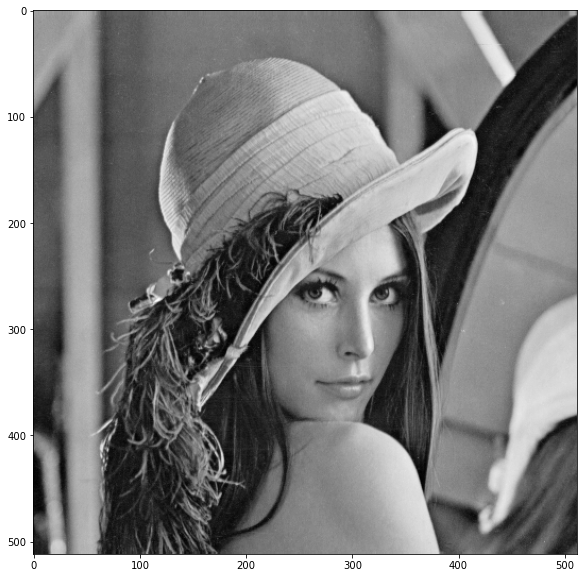

In [941]:
%%time
plt.figure(figsize=[10,10])
plt.imshow(myFilter2D(inputImage, kernel, paddingMethod='constant', paddingValue=0), cmap='gray')
# plt.imshow(myFilter2D(inputImage, kernel, paddingMethod='replicate'), cmap='gray')
# plt.imshow(myFilter2D(inputImage, kernel, paddingMethod='valid'), cmap='gray')